In [1]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

E-Bikes dropped: 338834
Original scooter entries: 6510117
NA rows dropped: 130
Out of Bounds entries dropped: 52981
Before removing outliers:


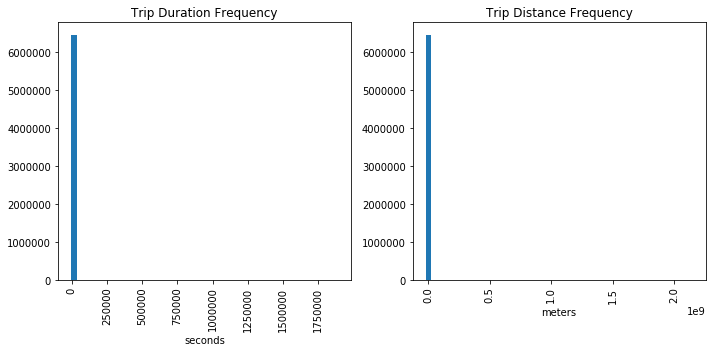

Negative duration dropped: 1028
Over 12.0 hours dropped: 262
Negative or 0 distance dropped: 505391
Distance > 49.9999845312 mi dropped: 965
After removing outliers:


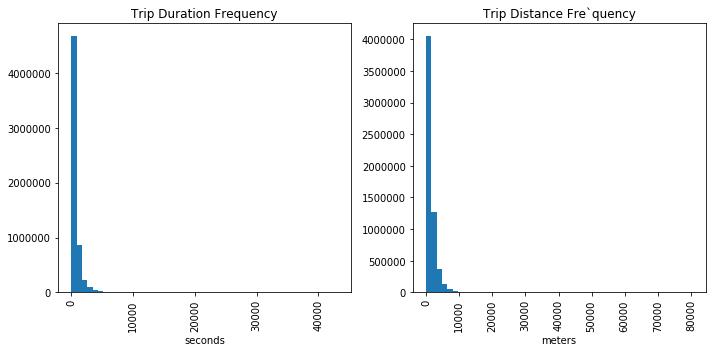

Total entries remaining: 5949360
Percent removed: 8.61362399477613%
Column Data types:
Device ID                           object
Vehicle Type                      category
Trip Duration                      float64
Trip Distance                      float64
Start Time                  datetime64[ns]
End Time                    datetime64[ns]
Modified Date               datetime64[ns]
Month                                 int8
Hour                                  int8
Day of Week                           int8
Council District (Start)           float64
Council District (End)             float64
Year                                 int16
Census Tract Start                  object
Census Tract End                    object
dtype: object


In [2]:
# Import/clean the data
%run ./data_wrangling.ipynb

Data cleaning removed many of the outliers of the data, but it's still difficult to see trends by observing all of the data at once.  If we 'zoom in' to the bulk of the data, more trends in duration and distance can be observed.

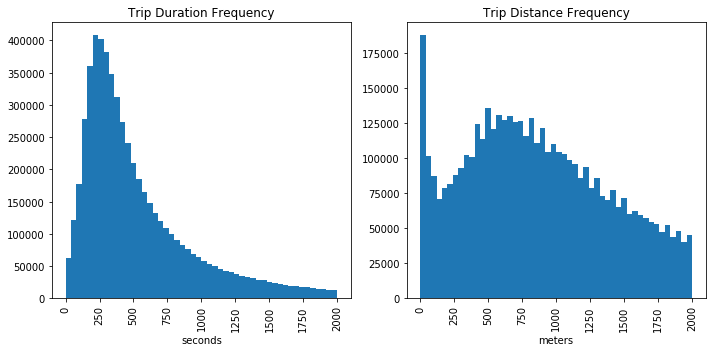

In [3]:
# Plot the histograms from above, with limits on the range
plt.figure(figsize=[10, 5])
plt.subplot(1,2,1)
plt.hist(scooters['Trip Duration'], bins=50, range=(0,2000))
plt.xlabel('seconds')
plt.title('Trip Duration Frequency')
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.hist(scooters['Trip Distance'], bins=50, range=(0, 2000))
plt.xlabel('meters')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()
plt.close()

Peaks that were otherwise hidden now reveal themselves.  The most rides appear to be be between 250-500 seconds (4-8 min) and 500-750 meters (0.3-0.5 mi). There's also a surprising peak just above 0 m.

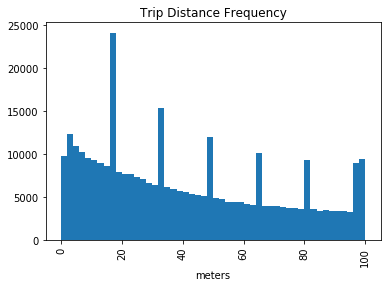

In [4]:
# Plot the 0-50 meters to see if there are any trends within the peak
plt.hist(scooters['Trip Distance'], bins=50, range=(0, 100))
plt.xlabel('meters')
plt.title('Trip Distance Frequency')
plt.xticks(rotation='vertical')

plt.show()
plt.close()

The plot from 0-100m reveals a few regularly placed peaks. These peaks likely result from different rounding practices from the vendors providing data.

**How many Census Tracts are in the data?**

In [5]:
print('Number of Census Tract Starts: ' + str(len(set(scooters['Census Tract Start']))))
print('Number of Census Tract Ends: ' + str(len(set(scooters['Census Tract End']))))
print('Number of unique Census Tracts in the data: ' + str(len(set(scooters['Census Tract End'].append(scooters['Census Tract Start']))))) 

Number of Census Tract Starts: 256
Number of Census Tract Ends: 257
Number of unique Census Tracts in the data: 271


The difference between these 3 values indicates that there are census tracts that have only trip starts or only trip ends.

**Which census tracts have the most traffic?**

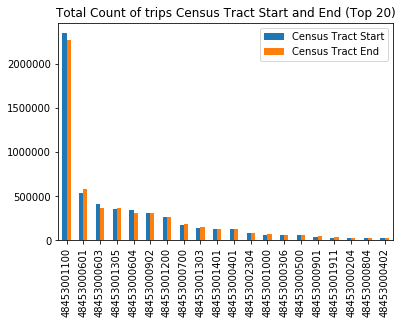

In [6]:
# Count how many trips started in each census tract
census_starts = pd.DataFrame(scooters['Census Tract Start'].value_counts())

# Count how many trips ended in each census tract
census_ends = pd.DataFrame(scooters['Census Tract End'].value_counts())

# Join start and end counts and plot the top 20. Value counts sorts descending, inner join preserves census start's sorting.
census_comp = census_starts.join(census_ends, how='inner')
census_comp.head(20).plot(kind='bar')
plt.title('Total Count of trips Census Tract Start and End (Top 20)')


plt.show()
plt.close()

CT 1100 is the clear frontrunner with the most trips. CT 1100 is Austin's downtown district, which likely accounts for its high ridership.

**Which days have the most traffic?**

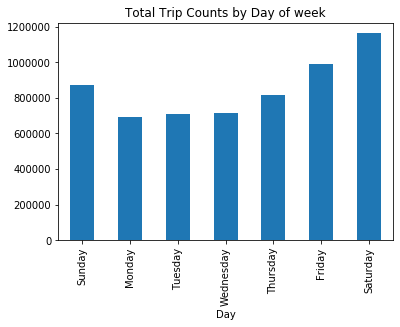

In [7]:
# Count trips per day and sort by day:
daily_total = pd.DataFrame(scooters['Day of Week'].value_counts().sort_index())

# Map day of week for better labels. Data documentation indicates "0=Sunday and so on.""
daily_total['Day'] = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot
daily_total.plot(kind='bar', x='Day', y='Day of Week', title='Total Trip Counts by Day of week', legend=False)

plt.show()
plt.close()

General ridership is flat during the week, and increases into the weekend.

**Does location affect day of week traffic differently?**

Top 4 starting location counts by day:


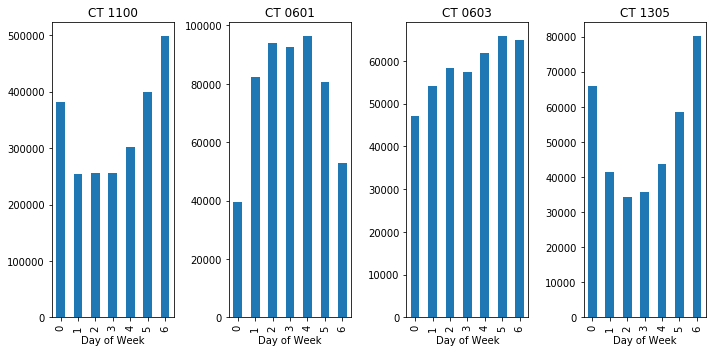

In [8]:
# Count start location by day:
weekday_start = scooters.groupby(by=['Day of Week', 'Census Tract Start']).count()

# Because the NAs are removed, the count value will be consistent throughout.  So arbitrarily use the Device ID column.
weekday_start_pivot = pd.pivot_table(weekday_start, index='Census Tract Start', values='Device ID', columns='Day of Week')

# Create plots to compare the top 4 starting locations
print('Top 4 starting location counts by day:')
plt.figure(figsize=[10, 5])

plt.subplot(1,4,1)
weekday_start_pivot.loc['48453001100'].plot(kind='bar')
plt.title('CT 1100')

plt.subplot(1,4,2)
weekday_start_pivot.loc['48453000601'].plot(kind='bar')
plt.title('CT 0601')

plt.subplot(1,4,3)
weekday_start_pivot.loc['48453000603'].plot(kind='bar')
plt.title('CT 0603')

plt.subplot(1,4,4)
weekday_start_pivot.loc['48453001305'].plot(kind='bar')
plt.title('CT 1305')

plt.tight_layout()
plt.show()
plt.close()

In CT 1100, weekend usage nearly doubles weekday usage.  In CT 0601, the opposite is true. This suggests that riders in CT 0601 are commuting and riders in CT 1100 are riding to weekend activities.

Top 4 ending location counts by day:


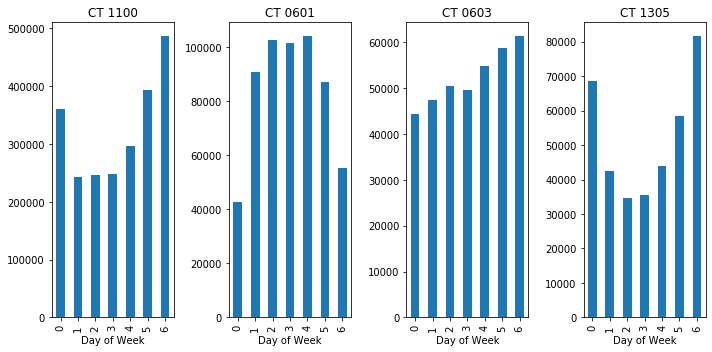

In [9]:
# Count end location by day:
weekday_end = scooters.groupby(by=['Day of Week', 'Census Tract End']).count()

# Because the NAs are removed, the count value will be consistent throughout each column.  So arbitrarily use the Device ID column.
weekday_end_pivot = pd.pivot_table(weekday_end, index='Census Tract End', values='Device ID', columns='Day of Week')

# Create plots to compare the top 4 ending locations
print('Top 4 ending location counts by day:')
plt.figure(figsize=[10, 5])

plt.subplot(1,4,1)
weekday_end_pivot.loc['48453001100'].plot(kind='bar')
plt.title('CT 1100')

plt.subplot(1,4,2)
weekday_end_pivot.loc['48453000601'].plot(kind='bar')
plt.title('CT 0601')

plt.subplot(1,4,3)
weekday_end_pivot.loc['48453000603'].plot(kind='bar')
plt.title('CT 0603')

plt.subplot(1,4,4)
weekday_end_pivot.loc['48453001305'].plot(kind='bar')
plt.title('CT 1305')

plt.tight_layout()
plt.show()
plt.close()

Ending locations appear to track with starting locations.

Some areas have more activity on weekends, others have more activity in the middle of the week.  This supports the hypothesis that day of week can be used to predict optimal scooter placement.

**Starting and ending graphs look pretty similar.  How many trips start and end in different neighborhoods?**

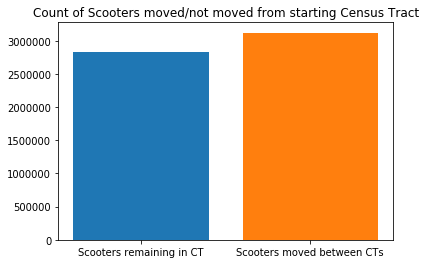

In [10]:
# Find entries where Census Tract Start and End are not equal
moved_scooters = scooters[scooters['Census Tract Start'] != scooters['Census Tract End']]
moved = moved_scooters.shape[0]

# Find entries where Census Tract Start and End are equal
stationary_scooters = scooters[scooters['Census Tract Start'] == scooters['Census Tract End']]
stationary = stationary_scooters.shape[0]

# Plot the results in a bar plot:
plt.bar('Scooters remaining in CT', moved)
plt.bar('Scooters moved between CTs', stationary)
plt.title('Count of Scooters moved/not moved from starting Census Tract')
plt.show()
plt.close()

More scooters are moved between Census Tracts than remain in their original Census Tract.

**Are certain months more popular than others?**

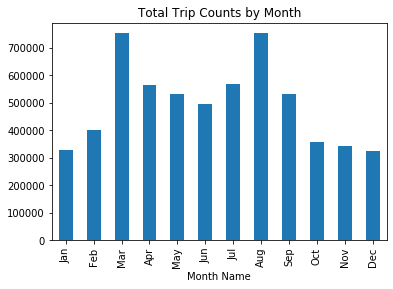

In [11]:
# Count trips per day and sort by day:
monthly_total = pd.DataFrame(scooters['Month'].value_counts().sort_index())

# Map month names for better labels.
monthly_total['Month Name'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot
monthly_total.plot(kind='bar', x='Month Name', y='Month', title='Total Trip Counts by Month', legend=False)

plt.show()
plt.close()

There appears to be more ridership in the warm summer months, with peaks in temperate March and August.

**How has ridership changed over time?**

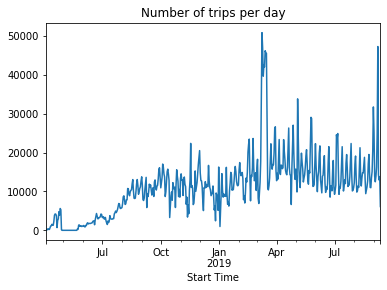

In [12]:
# Aggregate counts by day
scoots_per_day = scooters.resample('D', on='Start Time').count()

# Plot results (once again, arbitrarily using Device ID)
scoots_per_day['Device ID'].plot()
plt.title('Number of trips per day')
plt.show()
plt.close()

# Large peak in mid-march coincides with Austin's SXSW conference


In mid-march of 2019, there is a peak that coincides with Austin's SXSW conference.  The regularly spaced spikes in the data appear to fall on weekends.

**How does time of day affect ridership?**

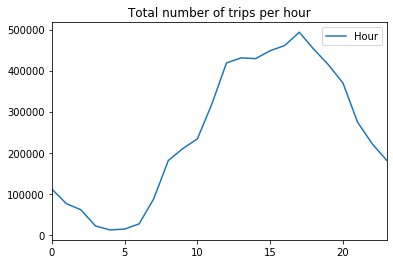

In [13]:
# Aggregate counts by hour for an arbitrarily chosen week in 2019
scoots_per_hour = pd.DataFrame(scooters['Hour'].value_counts().sort_index())

# Plot results (once again, arbitrarily using Device ID)
scoots_per_hour.plot()
plt.title('Total number of trips per hour')
plt.show()
plt.close()

The majority of trips appear to occur between 10:00 AM and 7:00 PM, with a peak in the lat afternoon.

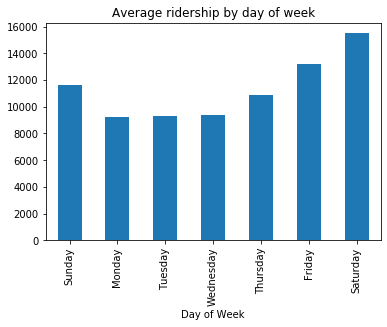

In [26]:
# Modify the scoots_per_day to include the actual Day of Week
scoots_per_day['Day of Week'] = scoots_per_day.index.weekday_name

# Group by day of week, aggregated by mean to obtain the average for each day.
average_by_weekday = scoots_per_day.groupby(by='Day of Week').mean()

# Plot using day_order to reorder the entries by day.
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_by_weekday['Device ID'].loc[day_order].plot(kind='bar')

plt.title('Average ridership by day of week')
plt.show()
plt.close()